# **Clustering**

Clustering is a Machine Learning technique that involves the grouping of data points. Given a set of data points, we can use a clustering algorithm to classify each data point into a specific group. In theory, data points that are in the same group should have similar properties and/or features, while data points in different groups should have highly dissimilar properties and/or features. Clustering is a method of unsupervised learning and is a common technique for statistical data analysis used in many fields.

Clustering is one of the types of unsupervised learning. It is similar to classification: the aim is to give a label to each data point. However, unlike in classification, we are not given any examples of labels associated with the data points. We must infer from the data, which data points belong to the same cluster. This can be achieved using some notion of distance between the data points. Data points in the same cluster are somehow close to each other.

There are various method for performing clustering. Some of them available in `sklearn` libraries are as below:

 + K-Means Clustering
 + Hierarchical clustering
 + DBSCAN
 + Affinity propagation
 + Spectral clustering
 + Gaussian mixtures
 + Mean-shift
 + Ward hierarchical clustering
 + OPTICS
 + Birch

Let's see some of the common algorithms.

## **K-Means Clustering**

The **KMeans** algorithm clusters data by trying to separate samples in n groups of equal variance, minimizing a criterion known as the inertia or within-cluster sum-of-squares (see below). This algorithm requires the number of clusters to be specified. It scales well to large number of samples and has been used across a large range of application areas in many different fields.

The k-means algorithm divides a set of $N$ samples $X$ into $K$ disjoint clusters $C$, each described by the mean $\mu_j$ of the samples in the cluster. The means are commonly called the cluster “centroids”; note that they are not, in general, points from , although they live in the same space.

The K-means algorithm aims to choose centroids that minimise the **inertia**, or **within-cluster sum-of-squares criterion**.

$$\sum_{i=0}^n \min_{\mu_j \in C}(|| x_i - \mu_j||^2)$$

Inertia can be recognized as a measure of how internally coherent clusters are. It suffers from various drawbacks:

 + Inertia makes the assumption that clusters are convex and isotropic, which is not always the case. It responds poorly to elongated clusters, or manifolds with irregular shapes.

 + Inertia is not a normalized metric: we just know that lower values are better and zero is optimal. But in very high-dimensional spaces, Euclidean distances tend to become inflated (this is an instance of the so-called “curse of dimensionality”). Running a dimensionality reduction algorithm such as Principal component analysis (PCA) prior to k-means clustering can alleviate this problem and speed up the computations.

In basic terms, the algorithm has three steps. 

1. The first step chooses the initial centroids, with the most basic method being to choose  samples from the dataset . 

2. After initialization, K-means consists of looping between the two other steps. The first step assigns each sample to its nearest centroid. 

3. The second step creates new centroids by taking the mean value of all of the samples assigned to each previous centroid. The difference between the old and the new centroids are computed and the algorithm repeats these last two steps until this value is less than a threshold. In other words, it repeats until the centroids do not move significantly.

Given enough time, K-means will always converge, however this may be to a local minimum. This is highly dependent on the initialization of the centroids. As a result, the computation is often done several times, with different initializations of the centroids. One method to help address this issue is the k-means++ initialization scheme, which has been implemented in scikit-learn (use the init='k-means++' parameter). This initializes the centroids to be (generally) distant from each other, leading to provably better results than random initialization, as shown in the reference.



## **Hierarchical Clustering**
If the K-means algorithm is concerned with centroids, hierarchical (also known as agglomerative) clustering tries to link each data point, by a distance measure, to its nearest neighbor, creating a cluster. Reiterating the algorithm using different linkage methods, the algorithm gathers all the available points into a rapidly diminishing number of clusters, until in the end all the points reunite into a single group.

This hierarchy of clusters is represented as a tree (or dendrogram). The root of the tree is the unique cluster that gathers all the samples, the leaves being the clusters with only one sample.

The **Agglomerative Clustering** object performs a hierarchical clustering using a bottom up approach: each observation starts in its own cluster, and clusters are successively merged together. The linkage criteria determines the metric used for the merge strategy:

 + Single linkage minimizes the distance between the closest observations of pairs of clusters.

 + Maximum or complete linkage minimizes the maximum distance between observations of pairs of clusters.

 + Average linkage minimizes the average of the distances between all observations of pairs of clusters.

 + Ward minimizes the sum of squared differences within all clusters. It is a variance-minimizing approach and in this sense is similar to the k-means objective function but tackled with an agglomerative hierarchical approach.

Compared to K-means, agglomerative algorithms are more cumbersome and do not scale well to large datasets. Agglomerative algorithms are more suitable for statistical studies. These algorithms do offer the advantage of creating a complete range of nested cluster solutions.

For calculating distance, we can use various distance metric already covered in KNN. These are:

 + Euclidean  distance
 + Manhattan distance
 + Mahalonobis distance
 + Cosine distance
 + Jaccard distance







### **Example - KMeans**

In [ ]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
# Setting the path
os.chdir("/content/drive/My Drive/Data_Science_Python")

In [ ]:
# Importing the dataset
dataset = pd.read_csv('./dataset/IRIS/iris.csv')
dataset.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [ ]:
# Checking missing values
dataset.isnull().sum()

sepal.length    0
sepal.width     0
petal.length    0
petal.width     0
variety         0
dtype: int64

In [ ]:
# Creating X
X = dataset.drop(['variety'], axis=1).values
Features_name = dataset.drop(['variety'], axis=1).columns

In [ ]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

sc.fit(X)
X = sc.transform(X)

#### **Choosing the Value of K**

##### **Elbow method**

We often know the value of K. In that case we use the value of K. In general, there is no method for determining exact value of K, but an accurate estimate can be obtained using the Elbow Method. We run the algorithm for different values of K (say K = 10 to 1) and plot the K values against SSE (Sum of Squared Errors). And select the value of K that causes sudden drop in the sum of squared distances, i.e., for the elbow point as shown in the figure.

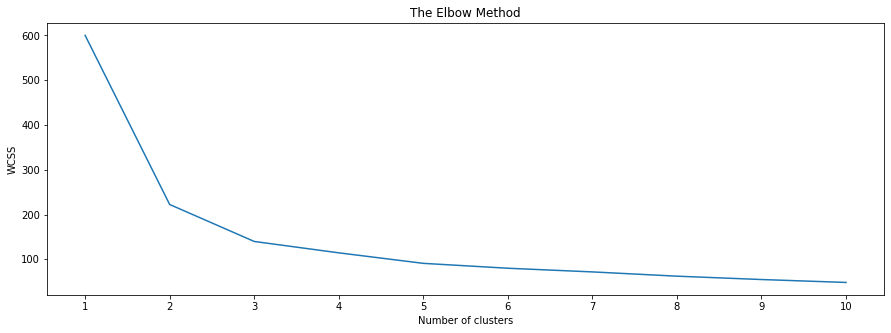

In [ ]:
# Using the elbow method to find the optimal number of clusters
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.figure(figsize = (15,5))
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xticks(range(1, 11))
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show();

##### **silhouette analysis**

Silhouette analysis can be used to study the separation distance between the resulting clusters. The silhouette plot displays a measure of how close each point in one cluster is to points in the neighboring clusters and thus provides a way to assess parameters like number of clusters visually. This measure has a range of [-1, 1].

Silhouette coefficients (as these values are referred to as) near +1 indicate that the sample is far away from the neighboring clusters. A value of 0 indicates that the sample is on or very close to the decision boundary between two neighboring clusters and negative values indicate that those samples might have been assigned to the wrong cluster.

If The silhouette plot shows that the n_clusters value are a bad pick for the given data if three are clusters with below average silhouette scores or wide fluctuations in the size of the silhouette plots.

In [ ]:
from sklearn.metrics import silhouette_samples, silhouette_score
range_n_clusters = range(2, 11)

for n_clusters in range_n_clusters:
    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

For n_clusters = 2 The average silhouette_score is : 0.5817500491982808
For n_clusters = 3 The average silhouette_score is : 0.45994823920518646
For n_clusters = 4 The average silhouette_score is : 0.41889233981710045
For n_clusters = 5 The average silhouette_score is : 0.34551099599809465
For n_clusters = 6 The average silhouette_score is : 0.32954501882669596
For n_clusters = 7 The average silhouette_score is : 0.3250205942792501
For n_clusters = 8 The average silhouette_score is : 0.33995144434148683
For n_clusters = 9 The average silhouette_score is : 0.33787169243426035
For n_clusters = 10 The average silhouette_score is : 0.35363500338258724


Automatically created module for IPython interactive environment
For n_clusters = 2 The average silhouette_score is : 0.5817500491982808
For n_clusters = 3 The average silhouette_score is : 0.45994823920518646
For n_clusters = 4 The average silhouette_score is : 0.41889233981710045
For n_clusters = 5 The average silhouette_score is : 0.34551099599809465
For n_clusters = 6 The average silhouette_score is : 0.32954501882669596
For n_clusters = 7 The average silhouette_score is : 0.3250205942792501
For n_clusters = 8 The average silhouette_score is : 0.33995144434148683
For n_clusters = 9 The average silhouette_score is : 0.33787169243426035
For n_clusters = 10 The average silhouette_score is : 0.35363500338258724


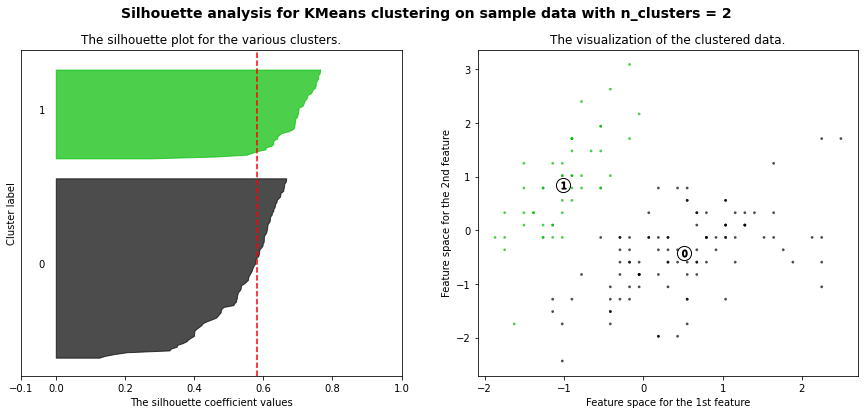

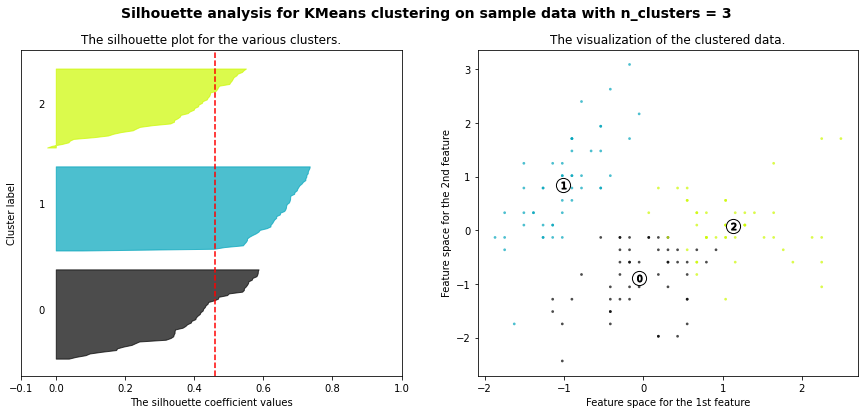

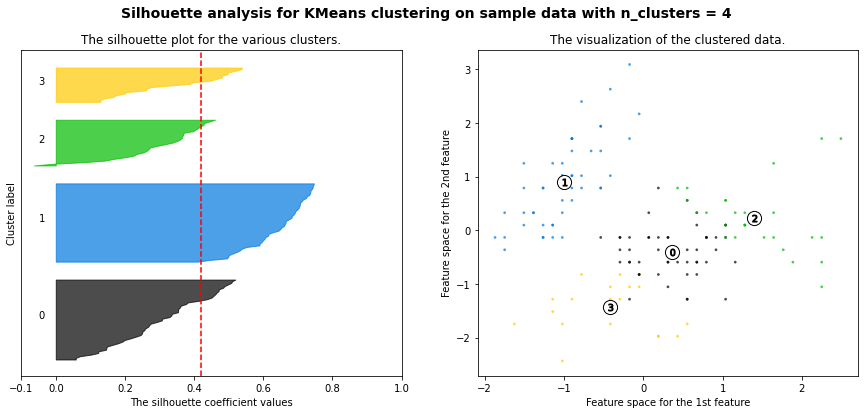

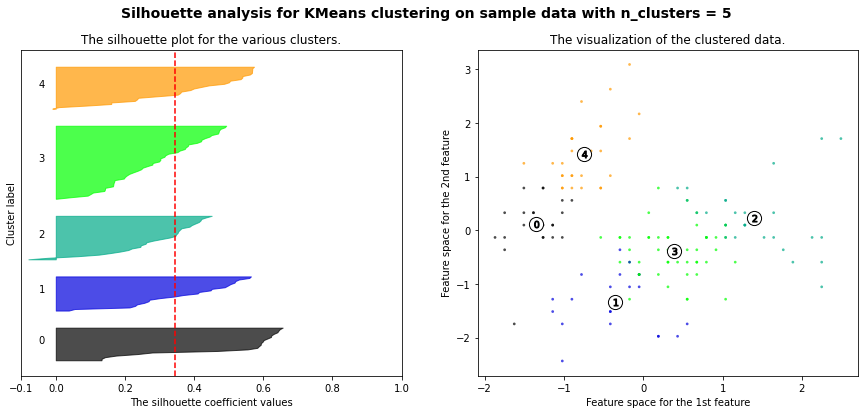

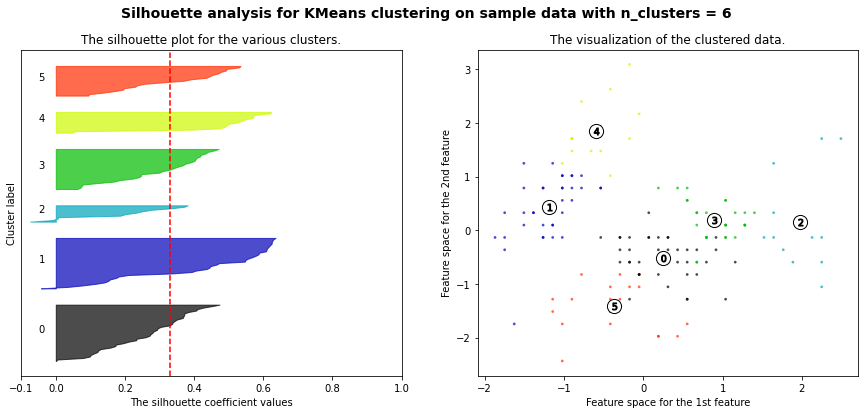

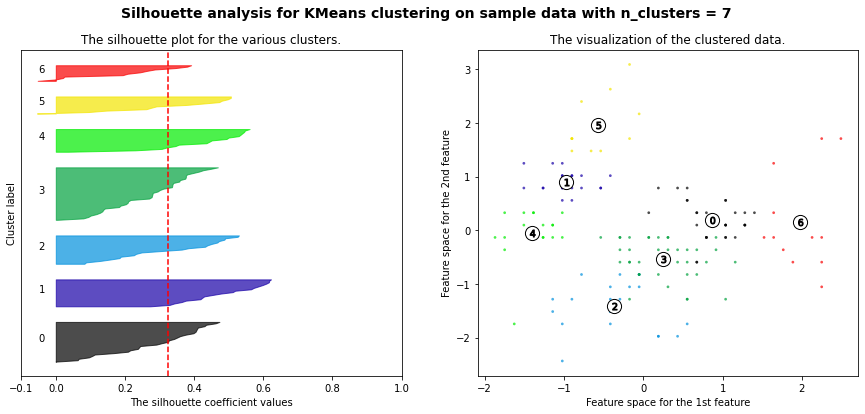

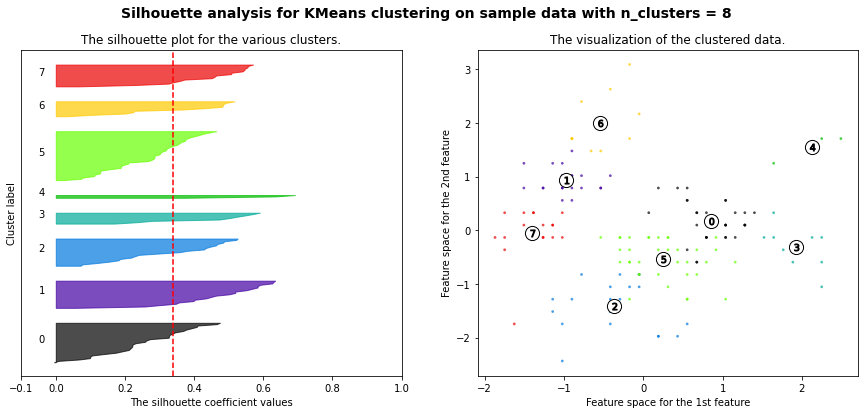

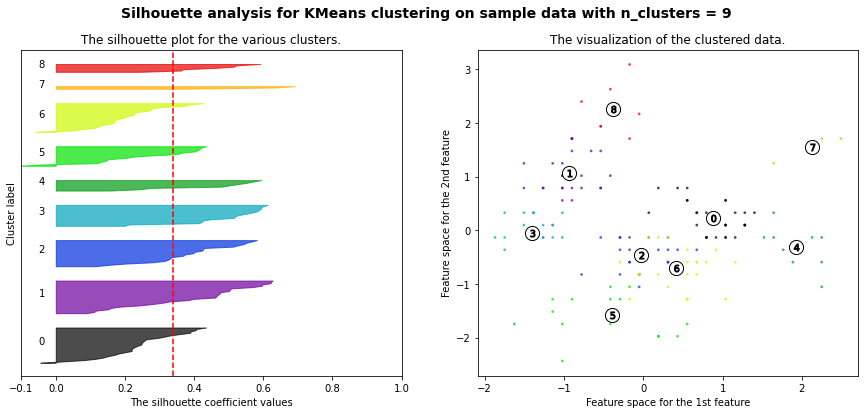

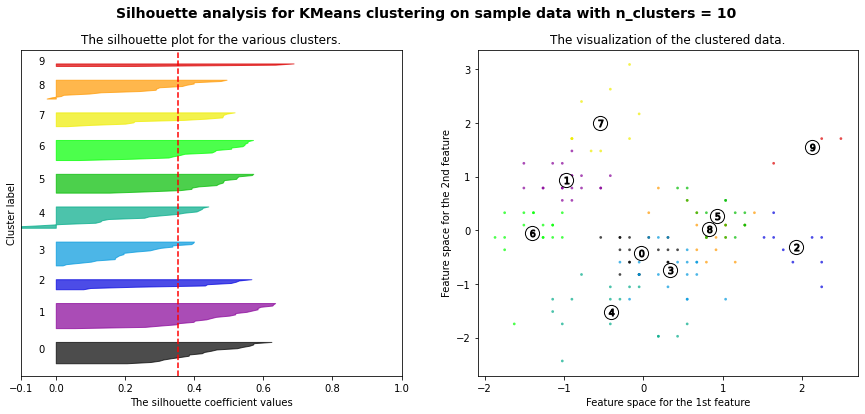

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

print(__doc__)

# Generating the sample data from make_blobs
# This particular setting has one distinct cluster and 3 clusters placed close
# together.
range_n_clusters = range(2, 11)

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(15, 6)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

#### **Fitting K-Means**

In [ ]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)
y_kmeans

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1,
       2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1,
       1, 2, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2], dtype=int32)

In [ ]:
dataset['Cluster_KMeans'] = y_kmeans
pd.crosstab(dataset.variety, dataset.Cluster_KMeans)

Cluster_KMeans,0,1,2
variety,,,
Setosa,50,0,0
Versicolor,0,11,39
Virginica,0,36,14


In [ ]:
dataset.groupby('Cluster_KMeans')['sepal.length', 'sepal.width', 'petal.length', 'petal.width'].mean()

,sepal.length,sepal.width,petal.length,petal.width
Cluster_KMeans,,,,
0,5.006000,3.428000,1.462000,0.246000
1,6.780851,3.095745,5.510638,1.972340
2,5.801887,2.673585,4.369811,1.413208


### **Example - Hierarchical Clustering**

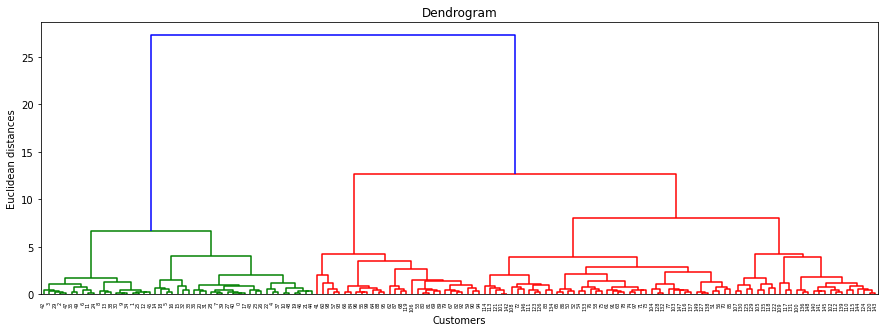

In [ ]:
# Using the dendrogram to find the optimal number of clusters
import scipy.cluster.hierarchy as sch
plt.figure(figsize=(15,5))
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show();

In [ ]:
# Fitting Hierarchical Clustering to the dataset
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(X)
y_hc

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 2, 0, 2, 0, 2, 0, 2, 2, 0, 2, 0, 2, 0,
       2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 0, 2, 0, 0, 2,
       2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
dataset['Cluster_hc'] = y_hc
pd.crosstab(dataset.variety, dataset.Cluster_hc)

Cluster_hc,0,1,2
variety,,,
Setosa,0,49,1
Versicolor,23,0,27
Virginica,48,0,2


In [ ]:
(49+27+48)/150

0.8266666666666667

In [ ]:
pd.crosstab(dataset.Cluster_KMeans, dataset.Cluster_hc)

Cluster_hc,0,1,2
Cluster_KMeans,,,
0,0,49,1
1,47,0,0
2,24,0,29


### **Example - DBSCAN**

In [ ]:
from sklearn.cluster import DBSCAN
DS = DBSCAN()s
y_DS = DS.fit_predict(X)
y_DS

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1, -1,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1, -1,
        0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  1,
        1,  1,  1,  1,  1, -1, -1,  1, -1, -1,  1, -1,  1,  1,  1,  1,  1,
       -1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
       -1,  1, -1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1, -1,  1, -1,  1,
        1,  1,  1, -1, -1, -1, -1, -1,  1,  1,  1,  1, -1,  1,  1, -1, -1,
       -1,  1,  1, -1,  1,  1, -1,  1,  1,  1, -1, -1, -1,  1,  1,  1, -1,
       -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1])

In [ ]:
dataset['Cluster_DS'] = y_DS
pd.crosstab(dataset.variety, dataset.Cluster_DS)

Cluster_DS,-1,0,1
variety,,,
Setosa,5,45,0
Versicolor,11,0,39
Virginica,18,0,32


In [ ]:
(45+39+32)/150

0.7733333333333333